<a href="https://colab.research.google.com/github/SUBHA2211/DATA_SETS/blob/main/LAAIML24_24CS91R13_MNIST_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all dependencies

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Step 1 (Data Loading): Load MNIST dataset

In [21]:
# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target.astype(int)  # X: image data, y: labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Visulizing data

In [22]:
print(X.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

In [23]:
print(y.head())

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64


In [24]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


2. Data Preprocessing: Normalize the data and manually convert labels to one-hot encoding

In [25]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Manually create one-hot encoded labels
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)


In [26]:
print(X.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

In [27]:
print(y_train_one_hot[:5])


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


3.Least Squares Model: Implement the least squares classifier using only np.linalg.lstsq to
solve for the weight matrix.

In [28]:
# Solve for W in the least squares equation X_train @ W ≈ y_train_one_hot
W, residuals, rank, s = np.linalg.lstsq(X_train, y_train_one_hot, rcond=None)


4. Prediction and Evaluation: Predict labels and manually calculate accuracy for training and test
sets.

In [29]:
# Predict class by taking the argmax of the output (highest value indicates predicted class)
y_train_pred = np.argmax(X_train @ W, axis=1)
y_test_pred = np.argmax(X_test @ W, axis=1)

# Manually calculate accuracy
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

train_accuracy = calculate_accuracy(y_train, y_train_pred)
test_accuracy = calculate_accuracy(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 85.37%
Test Accuracy: 84.91%


5. Visualization: Display some images with accurately predicted class.

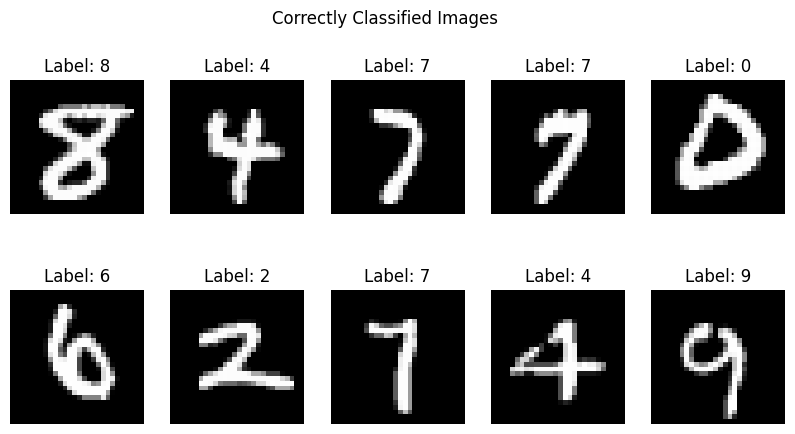

In [32]:
import matplotlib.pyplot as plt

# Select some correctly classified examples from the test set
correct_indices = np.where(y_test == y_test_pred)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_indices[:10]):  # Display first 10 correct predictions
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_test.iloc[idx]}")
    plt.axis("off")

plt.suptitle("Correctly Classified Images")
plt.show()


6. Optional Visualization: Display some misclassified images.

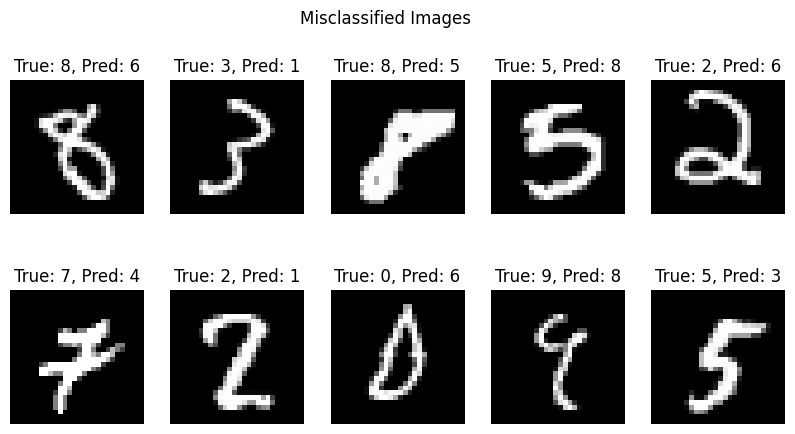

In [36]:
# Select some misclassified examples from the test set
incorrect_indices = np.where(y_test != y_test_pred)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):  # Display first 10 misclassifications
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test.values[idx]}, Pred: {y_test_pred[idx]}")
    plt.axis("off")

plt.suptitle("Misclassified Images")
plt.show()
